<a href="https://colab.research.google.com/github/JumanaKhrais/Transformer-Based-Deep-Learning-Models-for-Sarcasm-Detection-with-an-Imbalanced-Dataset./blob/main/Downsampling_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive') #this line to have the ability to read from and load to drive


Mounted at /content/drive


In [ ]:
! pip install transformers

**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification, AutoTokenizer 
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Dataset + Handling Null Values**


In [4]:
# Reading the dataset
pathT = "drive/MyDrive/TrainEnglish.csv"
train = pd.read_csv(pathT) 

In [5]:
data = train[['tweet', 'sarcastic']].copy()


In [6]:
data.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

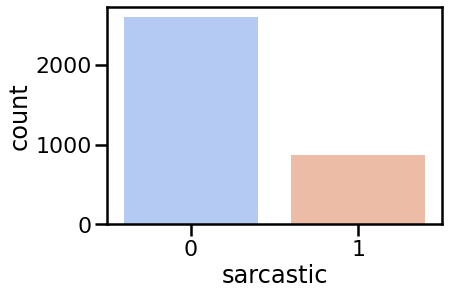

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
 
data = data
sns.set_context('poster', font_scale = 1)
sns.countplot(x ='sarcastic', data = data, palette ='coolwarm')

In [8]:
data['sarcastic'].value_counts()

0    2600
1     867
Name: sarcastic, dtype: int64

**Downsampling the Dataset**

In [9]:
ones = data.loc[data['sarcastic'] == 1, :]
numberOf1s = len(ones)
print(numberOf1s)

867


In [10]:
zeros = data.loc[data['sarcastic'] == 0, :]
sampled_zeros = zeros.sample(numberOf1s)

print(len(sampled_zeros))

867


In [11]:
Baldata = pd.concat([ones, sampled_zeros], ignore_index=True)

print(Baldata.shape)

(1734, 2)


In [12]:
Baldata['sarcastic'].value_counts()

1    867
0    867
Name: sarcastic, dtype: int64

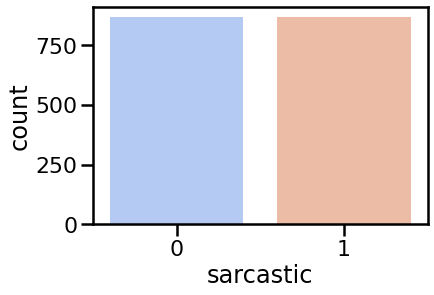

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
 
data = Baldata
sns.set_context('poster', font_scale = 1)
sns.countplot(x ='sarcastic', data = data, palette ='coolwarm')

In [ ]:
train, valid  = train_test_split(Baldata, test_size=0.15, shuffle = True , random_state= 42)
train= pd.DataFrame(train)
valid = pd.DataFrame(valid)
train.to_csv("drive/MyDrive/trainBal.csv", index= False) 
valid.to_csv("drive/MyDrive/validBal.csv", index = False) 
